In [1]:
%load_ext autoreload
%autoreload 2

import json
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from artifacts_annotator.generators.mask_generator import annotation_to_mask
from artifacts_annotator.generators.crop_generator import generate_crop_rectangles

In [2]:
# Example file paths
image_path = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.jpg")
json_path  = Path(r"d:\Roee\Code\AnnotationApp\examples\20230717_172940.json")

In [3]:
#  Cell 2: load image & annotations, rasterize to mask
with open(json_path, 'r') as f:
    annotations = json.load(f)

img = Image.open(image_path).convert('RGB')
w, h = img.size

# sub-stage 1
mask = annotation_to_mask((w, h), annotations)



In [5]:
#  Cell 3: compute safe_map and derive crop boxes
#≥50% coverage windows of size 128×128
crop_boxes = generate_crop_rectangles(mask,
                                                window_size=(128,128),
                                                min_fraction=0.5)



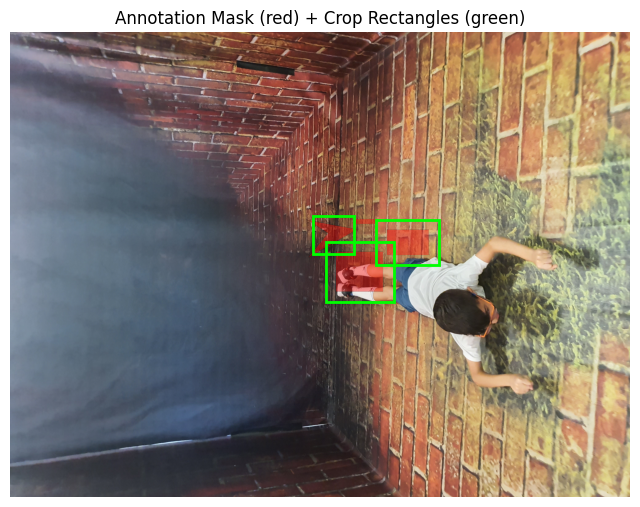

In [6]:
# Cell 4: visualize mask & crop rectangles overlayed
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)

# overlay raw mask in red
overlay = np.zeros((h, w, 4))
overlay[mask] = (1, 0, 0, 0.4)
ax.imshow(overlay, extent=(0, w, h, 0))

# draw green crop boxes
for left, top, right, bottom in crop_boxes:
    rect = patches.Rectangle((left, top),
                             right-left,
                             bottom-top,
                             edgecolor='lime',
                             fill=False,
                             linewidth=2)
    ax.add_patch(rect)

ax.set_title("Annotation Mask (red) + Crop Rectangles (green)")
ax.axis('off')
plt.show()
